# Classification Algorithms and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold
* KNN

Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Setting global seed of notebook

In [2]:
np.random.seed(seed=25)

### Task 1: Load Data from 'titanic_clean.csv'

In [5]:
#write code here
import pandas as pd

# Load the Titanic dataset
file_path = '/content/titanic_clean.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### One Hot encoding for categorical varaibles

In [6]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,2,1,1,0,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
2,3,1,0,0,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,4,1,1,0,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
4,138,0,1,0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [8]:
df=df_OneHot.copy()

### Task 2: Create Independent and Dependent Variables

In [9]:
# Creating independent (X) and dependent (y) variables

X = titanic_data.drop(columns=['PassengerId', 'Survived'])
y = titanic_data['Survived']

# Display the first few rows of the independent variables and dependent variable
X.head(), y.head()


(   Pclass     Sex  SibSp  Parch Embarked Title GrpSize FareCat AgeCat
 0       3    male      1      0        S    Mr  couple    0-10  16-32
 1       1  female      1      0        C   Mrs  couple  70-100  32-48
 2       3  female      0      0        S  Miss    solo    0-10  16-32
 3       1  female      1      0        S   Mrs  couple   40-70  32-48
 4       1    male      1      0        S    Mr  couple   40-70  32-48,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

### Task 3: Train Test n Split the data

In [10]:
# Import the library
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 9), (179, 9), (712,), (179,))

In [14]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
331,2,male,0,0,S,Mr,solo,Oct-25,32-48
733,2,male,0,0,S,Mr,solo,Oct-25,16-32
382,1,female,1,0,S,Miss,group,70-100,48-64
704,1,male,1,0,S,Mr,couple,40-70,32-48
813,2,female,0,0,S,Mrs,couple,Oct-25,48-64


In [16]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# 1. Logistic Regression

### Creating Model & Training

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model = LogisticRegression(random_state=25)

In [23]:
# One-hot encoding the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the encoded data into training and testing sets again
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Now you can fit the model without error
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_encoded, y_train)

# Check model performance
y_pred = lr_model.predict(X_test_encoded)


### Evaluation

In [24]:
pred = lr_model.predict(X_test_encoded)

In [25]:
pred[0:9]

array([0, 1, 0, 1, 0, 0, 1, 1, 0])

Predicting prabability of **0** and **1**

In [27]:
pred_prb = lr_model.predict_proba(X_test_encoded)

In [28]:
pred_prb[0:9,0:9]

array([[0.72890538, 0.27109462],
       [0.42169503, 0.57830497],
       [0.92507444, 0.07492556],
       [0.39166891, 0.60833109],
       [0.72864978, 0.27135022],
       [0.94366255, 0.05633745],
       [0.28805906, 0.71194094],
       [0.48287985, 0.51712015],
       [0.83470391, 0.16529609]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [30]:
lr_pred_prb = lr_model.predict_proba(X_test_encoded)[:,1]

### Comparison of Predicted and Actual

In [31]:
X_test_encoded.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,...,GrpSize_solo,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
709,2,0,0,True,True,False,False,False,False,True,...,True,False,False,False,False,True,False,False,True,False
439,3,0,0,False,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
840,3,0,0,True,False,True,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
720,1,0,0,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,True,False
39,2,0,0,True,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [34]:
xt = X_test_encoded.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = y_test
xt.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,...,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
709,2,0,0,True,True,False,False,False,False,True,...,False,False,True,False,False,True,False,0,0.271095,0
439,3,0,0,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,1,0.578305,1
840,3,0,0,True,False,True,False,True,False,False,...,False,False,False,True,False,False,False,0,0.074926,0
720,1,0,0,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,1,0.608331,1
39,2,0,0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,0,0.271350,0


### Confusion Matrix Play ground

In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, pred)

array([[95, 16],
       [16, 52]])

In [39]:
confusion_matrix(y_test, pred).ravel()

array([95, 16, 16, 52])

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,52,16
Not Survived,16,95


### Accuracy

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8212290502793296


In [45]:
accuracy_lr = accuracy_score(y_test,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8212290502793296


### Precision

In [46]:
from sklearn.metrics import precision_score

In [47]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7647058823529411
Precision for 0: 0.8558558558558559


In [49]:
precision_lr = precision_score(y_test,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7647058823529411


### Recall

In [50]:
from sklearn.metrics import recall_score

In [51]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7647058823529411
Recall for 0: 0.8558558558558559


In [53]:
recall_lr = recall_score(y_test,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7647058823529411


### F1 Score

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.7647058823529412
F1 Score for 0: 0.8558558558558559


In [56]:
f1_lr=f1_score(y_test,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7647058823529411


### Class Distribution in Training Data

In [57]:
y_train.value_counts()

,count
Survived,
0,438
1,274


### Classification Report

In [58]:
from sklearn.metrics import classification_report

In [59]:
#get report of precision recall and f1 score
print(classification_report(y_test,pred))
#macro avg

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       111
           1       0.76      0.76      0.76        68

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



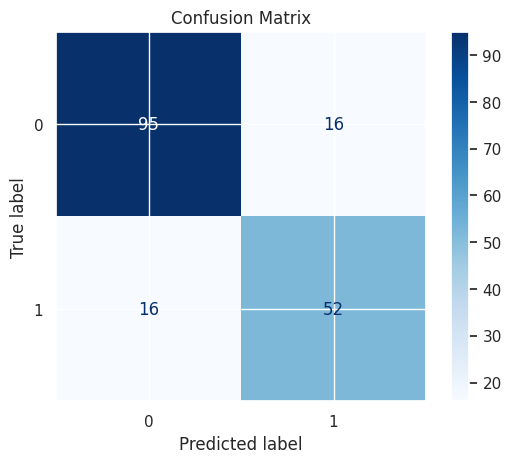

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Predict probabilities and labels
lr_pred_prb = lr_model.predict_proba(X_test_encoded)[:, 1]  # probabilities for the positive class

# Thresholding to convert probabilities into binary predictions
threshold = 0.5
lr_pred_labels = (lr_pred_prb >= threshold).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, lr_pred_labels)

# Use ConfusionMatrixDisplay to plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()



### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [63]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [64]:
tpr, fpr

(0.7647058823529411, 0.14414414414414414)

In [65]:
fpr = 1 - recall_0
tpr, fpr

(0.7647058823529411, 0.14414414414414412)

Defining function to plot ROC AUC Curve

In [66]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [69]:
fpr,tpr,threshold=roc_curve(y_test,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [71]:
auc_lr=roc_auc_score(y_test,lr_pred_prb)
auc_lr

0.827239003709592

Plotting AUC ROC Curve

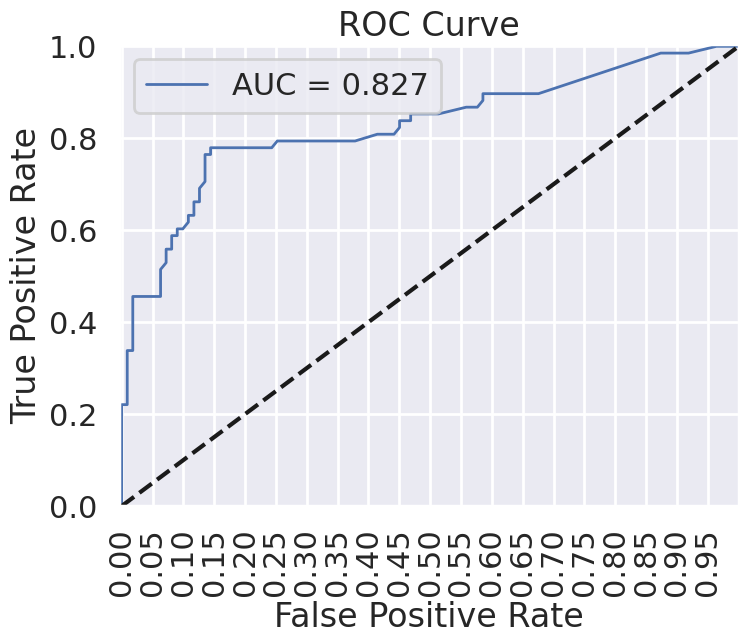

In [72]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

## Model Complexity

In [81]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# One-hot encoding the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split with encoded data
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# List to store accuracy for training and testing data
acc_train = []
acc_test = []

# Loop to generate polynomial features of degree 1 to 3 (to limit complexity)
for i in range(1, 4):
    poly_reg = PolynomialFeatures(degree=i)

    # Apply polynomial transformation
    X_tr_poly = poly_reg.fit_transform(X_train_scaled)
    X_tst_poly = poly_reg.transform(X_test_scaled)

    # Train the logistic regression model with regularization to prevent overfitting
    lr_poly = LogisticRegression(random_state=25, max_iter=1000, penalty='l2')
    lr_poly.fit(X_tr_poly, y_train)

    # Make predictions
    y_tr_predicted = lr_poly.predict(X_tr_poly)
    y_tst_predicted = lr_poly.predict(X_tst_poly)

    # Calculate and store accuracy for both train and test sets
    acc_train.append(accuracy_score(y_train, y_tr_predicted))
    acc_test.append(accuracy_score(y_test, y_tst_predicted))

# Output the training and testing accuracies for each polynomial degree
acc_train, acc_test



([0.8426966292134831, 0.8862359550561798, 0.8974719101123596],
 [0.8156424581005587, 0.7877094972067039, 0.7486033519553073])

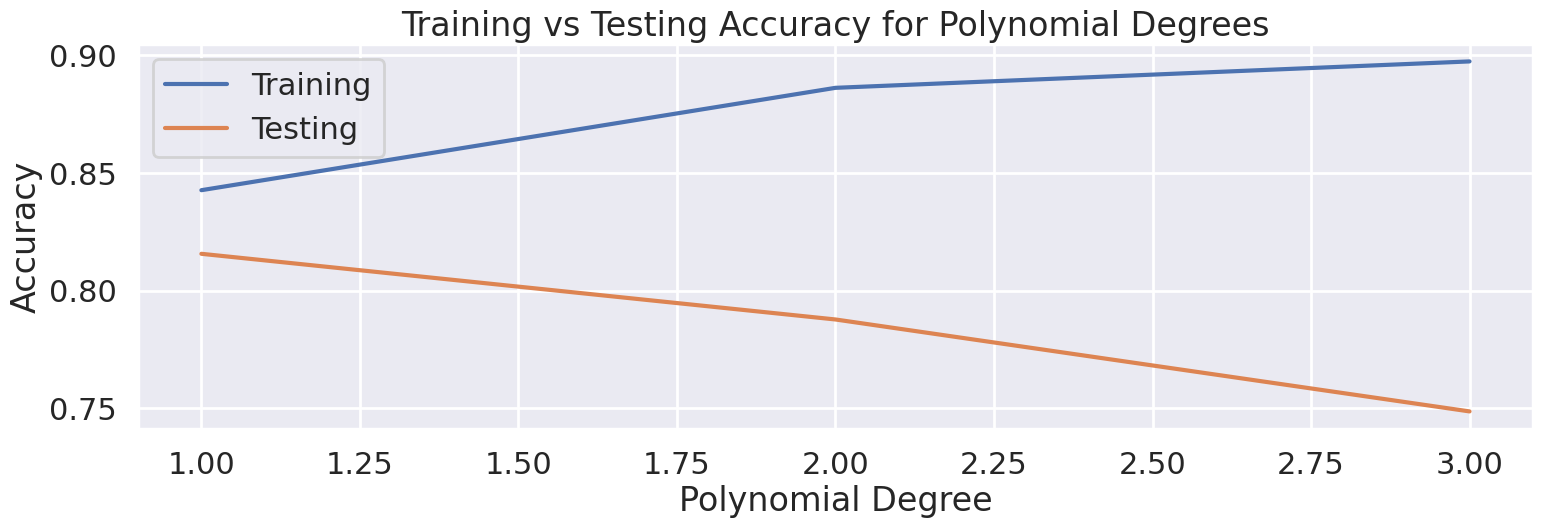

In [83]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

# The x-values should be 1 to 3 to match the length of acc_train and acc_test
sns.lineplot(x=list(range(1, 4)), y=acc_train, label='Training')
sns.lineplot(x=list(range(1, 4)), y=acc_test, label='Testing')

plt.title('Training vs Testing Accuracy for Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 2. K Nearest Neighbors (KNN)

### Task 4: Create Independent and Dependent Variables

In [84]:
# For K-Nearest Neighbors (KNN), we will use the same independent (X) and dependent (y) variables as before

# Independent variables (X) - encoded categorical data
X_knn = pd.get_dummies(X, drop_first=True)

# Dependent variable (y)
y_knn = y

# Display the first few rows of the independent and dependent variables
X_knn.head(), y_knn.head()


(   Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Title_Miss  \
 0       3      1      0      True       False        True       False   
 1       1      1      0     False       False       False       False   
 2       3      0      0     False       False        True        True   
 3       1      1      0     False       False        True       False   
 4       1      1      0      True       False        True       False   
 
    Title_Mr  Title_Mrs  Title_Rare Title  ...  GrpSize_solo  FareCat_100+  \
 0      True      False             False  ...         False         False   
 1     False       True             False  ...         False         False   
 2     False      False             False  ...          True         False   
 3     False       True             False  ...         False         False   
 4      True      False             False  ...         False         False   
 
    FareCat_25-40  FareCat_40-70  FareCat_70-100  FareCat_Oct-25  AgeCat_16-32  \
 0

### Task 5: Train test and split the dataset

In [86]:
# Splitting the dataset into training and testing sets for KNN
from sklearn.model_selection import train_test_split

# Using 80% of the data for training and 20% for testing
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train_knn.shape, X_test_knn.shape, y_train_knn.shape, y_test_knn.shape


((712, 22), (179, 22), (712,), (179,))

For KNN, we need to stadardize data first

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data (scaling the features)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_knn_scaled = scaler.fit_transform(X_train_knn)
X_test_knn_scaled = scaler.transform(X_test_knn)

# Display the first few rows of the standardized training data
pd.DataFrame(X_train_knn_scaled).head()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.351371,-0.471539,-0.473374,0.751555,-0.308844,0.605477,-0.531867,0.855780,-0.397144,-0.156398,...,0.947980,-0.250373,-0.461462,-0.314270,-0.262810,1.785563,-1.122639,1.771873,-0.286473,-0.119352
1,-0.351371,-0.471539,-0.473374,0.751555,-0.308844,0.605477,-0.531867,0.855780,-0.397144,-0.156398,...,0.947980,-0.250373,-0.461462,-0.314270,-0.262810,1.785563,0.890759,-0.564374,-0.286473,-0.119352
2,-1.537038,0.426150,-0.473374,-1.330574,-0.308844,0.605477,1.880168,-1.168524,-0.397144,-0.156398,...,-1.054874,-0.250373,-0.461462,-0.314270,3.805031,-0.560047,-1.122639,-0.564374,3.490728,-0.119352
3,-1.537038,0.426150,-0.473374,0.751555,-0.308844,0.605477,-0.531867,0.855780,-0.397144,-0.156398,...,-1.054874,-0.250373,-0.461462,3.181981,-0.262810,-0.560047,-1.122639,1.771873,-0.286473,-0.119352
4,-0.351371,-0.471539,-0.473374,-1.330574,-0.308844,0.605477,-0.531867,-1.168524,2.517977,-0.156398,...,-1.054874,-0.250373,-0.461462,-0.314270,-0.262810,1.785563,-1.122639,-0.564374,3.490728,-0.119352


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

[0.8806179775280899]
[0.7597765363128491]
[0.8806179775280899, 0.8202247191011236]
[0.7597765363128491, 0.770949720670391]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749, 0.776536312849162]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618, 0.8497191011235955]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749, 0.776536312849162, 0.7821229050279329]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618, 0.8497191011235955, 0.8497191011235955]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749, 0.776536312849162, 0.7821229050279329, 0.770949720670391]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618, 0.8497191011235955, 0.8497191011235955, 0.8412921348314607]
[0.7597765363128491,

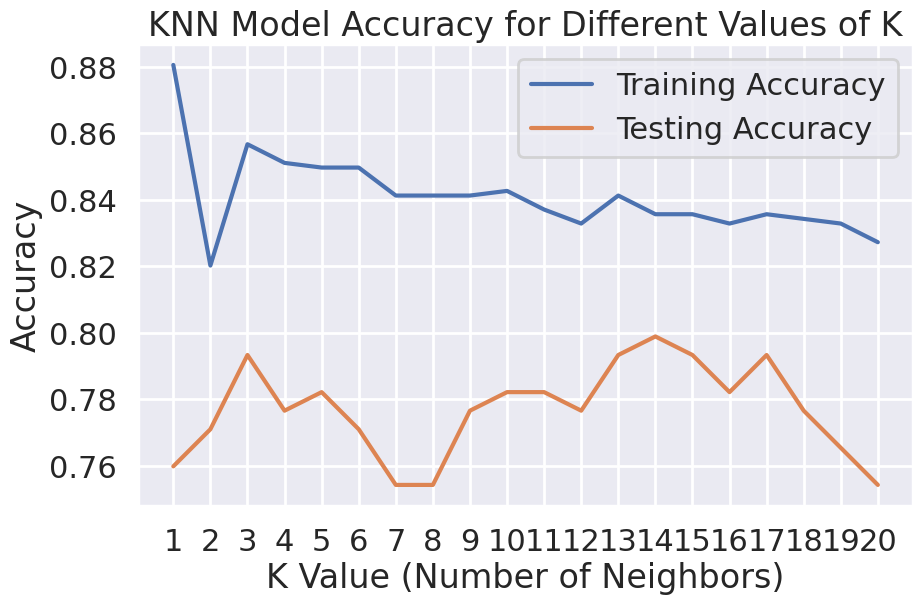

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store accuracy scores for different values of K
train_accuracies = []
test_accuracies = []

# Loop over a range of K values to find the best K
for k in range(1, 21):
    # Initialize the KNN model with current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the scaled training data
    knn.fit(X_train_knn_scaled, y_train_knn)

    # Predict on both training and testing sets
    y_train_pred = knn.predict(X_train_knn_scaled)
    y_test_pred = knn.predict(X_test_knn_scaled)

    # Calculate the accuracy for both training and testing sets
    train_accuracies.append(accuracy_score(y_train_knn, y_train_pred))
    test_accuracies.append(accuracy_score(y_test_knn, y_test_pred))
    print(train_accuracies)
    print(test_accuracies)

# Plot

# Plotting the accuracy scores for different values of K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
plt.xticks(range(1, 21))
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different Values of K')
plt.legend()
plt.grid(True)
plt.show()



In [92]:
from sklearn.metrics import classification_report

# Choose the best K value based on the previous plot (let's assume K=5 for this example)
best_k = 5
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model with the best K value
knn_best.fit(X_train_knn_scaled, y_train_knn)

# Predict the results on the test set
y_test_pred_best = knn_best.predict(X_test_knn_scaled)

# Generate the classification report
report = classification_report(y_test_knn, y_test_pred_best)

# Display the classification report
print(report)


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       111
           1       0.74      0.66      0.70        68

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



### Model Complexity

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store accuracy scores for different values of K
train_accuracies = []
test_accuracies = []

# Loop over a range of K values to analyze model complexity
for k in range(1, 31):  # Increase range to 30 to observe the model's behavior for more K values
    # Initialize the KNN model with current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the scaled training data
    knn.fit(X_train_knn_scaled, y_train_knn)

    # Predict on both training and testing sets
    y_train_pred = knn.predict(X_train_knn_scaled)
    y_test_pred = knn.predict(X_test_knn_scaled)

    # Calculate the accuracy for both training and testing sets
    train_accuracies.append(accuracy_score(y_train_knn, y_train_pred))
    test_accuracies.append(accuracy_score(y_test_knn, y_test_pred))
    print(train_accuracies)
    print(test_accuracies)




[0.8806179775280899]
[0.7597765363128491]
[0.8806179775280899, 0.8202247191011236]
[0.7597765363128491, 0.770949720670391]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749, 0.776536312849162]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618, 0.8497191011235955]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749, 0.776536312849162, 0.7821229050279329]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618, 0.8497191011235955, 0.8497191011235955]
[0.7597765363128491, 0.770949720670391, 0.7932960893854749, 0.776536312849162, 0.7821229050279329, 0.770949720670391]
[0.8806179775280899, 0.8202247191011236, 0.8567415730337079, 0.851123595505618, 0.8497191011235955, 0.8497191011235955, 0.8412921348314607]
[0.7597765363128491,

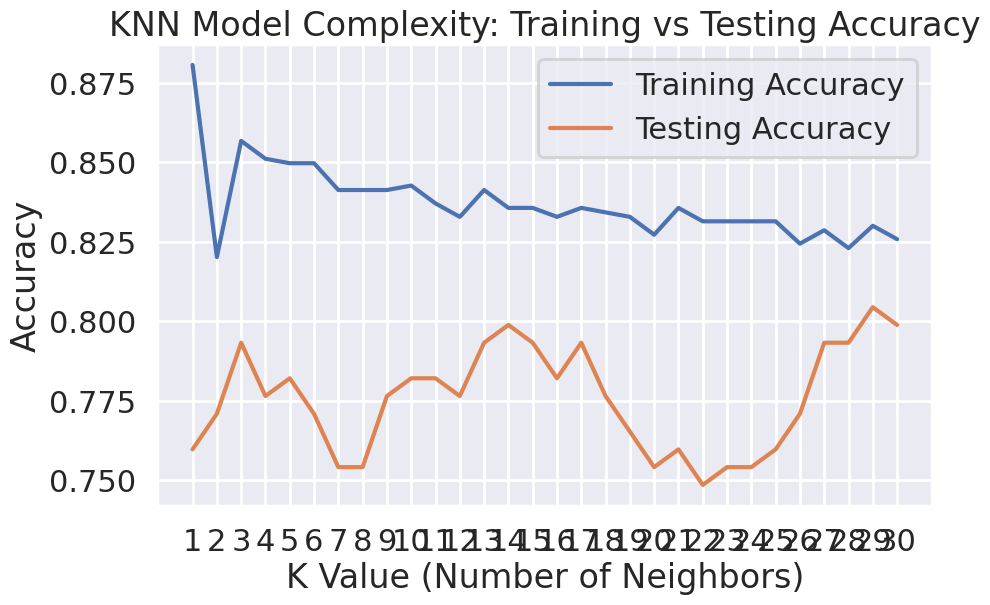

In [95]:
# Plotting the accuracy scores for different values of K (Model Complexity Curve)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 31), test_accuracies, label='Testing Accuracy')
plt.xticks(range(1, 31))
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Model Complexity: Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 3. Submission on Kaggle

### Task 6: Import test data

In [96]:
# Task 6: Import and Preprocess Test Data

# Assuming the test file is 'test.csv' and you've uploaded it
test_data = pd.read_csv('/content/titanic_clean.csv')

# Apply the same preprocessing steps as training data
# For example, encoding categorical variables
X_test_kaggle = pd.get_dummies(test_data, drop_first=True)

# Ensure that the test set has the same features as the training set
# Aligning the test data columns with training data columns
X_test_kaggle = X_test_kaggle.reindex(columns=X_train_knn.columns, fill_value=0)

# Standardize the test data (use the same scaler fitted on training data)
X_test_kaggle_scaled = scaler.transform(X_test_kaggle)

# Make predictions on the test data
y_test_kaggle_pred = knn_best.predict(X_test_kaggle_scaled)

# Task 7: Prepare Submission File for Kaggle

# Prepare submission DataFrame (typically Kaggle requires PassengerId and predictions)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # Assuming 'PassengerId' exists in test set
    'Survived': y_test_kaggle_pred  # The predicted values
})

# Save the submission DataFrame to a CSV file
submission.to_csv('/content/titanic_clean.csv', index=False)

# Now the file 'submission.csv' is ready for submission on Kaggle


### Task 7: Do One Hot encoding of test data

In [97]:
#write code here
# One-hot encoding the test data
# Assuming that test_data is already loaded and similar to training data in structure
X_test_kaggle = pd.get_dummies(test_data, drop_first=True)

# Ensure that the test set has the same features as the training set
# Aligning the test data columns with training data columns by adding any missing columns with zero values
X_test_kaggle = X_test_kaggle.reindex(columns=X_train_knn.columns, fill_value=0)

# Display the first few rows of the one-hot encoded test data
X_test_kaggle.head()


,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,...,GrpSize_solo,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,3,1,0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,1,0,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,3,0,0,False,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,1,0,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,1,1,0,True,False,True,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False


### Task 8: Separate Passenger ID for submission

In [98]:
#Write code here
# Assuming the test dataset has been loaded into 'test_data' and contains a 'PassengerId' column

# Separate the PassengerId column for the submission
passenger_ids = test_data['PassengerId']

# Display the first few Passenger IDs to confirm
passenger_ids.head()


,PassengerId
0,1
1,2
2,3
3,4
4,138


### Task 9: Do prediction through final model

In [99]:
# 1. Load the test data
test_data = pd.read_csv('/content/titanic_clean.csv')  # Replace with your test data path

# 2. One-hot encoding the test data
X_test_kaggle = pd.get_dummies(test_data, drop_first=True)

# 3. Ensure that the test set has the same features as the training set
X_test_kaggle = X_test_kaggle.reindex(columns=X_train_knn.columns, fill_value=0)

# 4. Standardize the test data (use the same scaler fitted on the training data)
X_test_kaggle_scaled = scaler.transform(X_test_kaggle)

# 5. Make predictions using the final KNN model
y_test_kaggle_pred = knn_best.predict(X_test_kaggle_scaled)

# Display the first few predictions
y_test_kaggle_pred[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Creating Data Frame for submission

In [101]:
# Ensure that the test data has been loaded and PassengerId has been extracted
passenger_ids = test_data['PassengerId']  # Extract Passenger IDs from the test dataset

# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': passenger_ids,  # Passenger IDs from the test dataset
    'Survived': y_test_kaggle_pred  # Predictions from the final model
})

# Display the first few rows of the submission DataFrame
submission.head()

# Save the submission file
submission.to_csv('/content/titanic_clean.csv', index=False)


In [102]:
submission.head()

,PassengerId,Survived
0,1,1
1,2,1
2,3,1
3,4,1
4,138,1


### Task 10: Export the dataset into csv file

In [103]:
# Write code here
# 1. Load the test data
test_data = pd.read_csv('/content/titanic_clean.csv')  # Replace with your test file path

# 2. Extract PassengerId for submission
passenger_ids = test_data['PassengerId']

# 3. One-hot encoding the test data
X_test_kaggle = pd.get_dummies(test_data, drop_first=True)

# 4. Ensure the test set has the same features as the training set
X_test_kaggle = X_test_kaggle.reindex(columns=X_train_knn.columns, fill_value=0)

# 5. Standardize the test data (use the same scaler fitted on the training data)
X_test_kaggle_scaled = scaler.transform(X_test_kaggle)

# 6. Make predictions using the final KNN model
y_test_kaggle_pred = knn_best.predict(X_test_kaggle_scaled)

# 7. Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,  # Passenger IDs from the test dataset
    'Survived': y_test_kaggle_pred  # Predictions from the final model
})

# 8. Export the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

# 9. Confirm the file is saved by displaying the first few rows
submission.head()


,PassengerId,Survived
0,1,1
1,2,1
2,3,1
3,4,1
4,138,1
